In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Hopfield import Hopfield
from Hopfield import calculate_energy
import itertools

3.1 Convergence and attractors

• Apply the update rule repeatedly until you reach a stable fixed point. Did
all the patterns converge towards stored patterns?

In [2]:
patterns = np.array([[-1, -1, 1, -1, 1, -1, -1, 1],
                     [-1, -1, -1, -1, -1, 1, -1, -1], 
                     [-1, 1, 1, -1, -1, 1, -1, 1]])

distorted_patterns  = np.array([[1, -1, 1, -1, 1, -1, -1, 1], 
                                 [1, 1, -1, -1, -1, 1, -1, -1], 
                                 [1, 1, 1, -1, 1, 1, -1, 1]])



model = Hopfield(8)
model.fit(patterns)

for i in range(len(distorted_patterns)):
    prediciton,_ = model.predict(distorted_patterns[i],100, "synchronous")
    if(np.array_equal(patterns[i],prediciton)):
        print("True, The model could retrive the pattern p" +str(i+1))
    else:
        print("False, The model could not retrive the pattern p" +str(i+1))    
              


#From the result below, it seems that only the first distorted pattern 
#converge towards stored pattern

True, The model could retrive the pattern p1
False, The model could not retrive the pattern p2
False, The model could not retrive the pattern p3


• How many attractors are there in this network? Hint: automate the
searching.

In [3]:
all_combinations = np.array([np.array(i) for i in itertools.product([-1, 1], repeat=8)])
model = Hopfield(8)
model.fit(patterns)
result=[]
for i in range(len(all_combinations)):
    prediciton, _ = model.predict(all_combinations[i].copy(),1000, "synchronous")
    result.append(prediciton)

resultt=np.array(result)
attractors = np.unique(resultt, axis=0)
print("The number of attractors is: " + str(len(attractors)))


The number of attractors is: 64


In [4]:
#check if x1,x2 and x3 are attractors
i=1 
for pattern in patterns:
     for attractor in attractors:
         if(np.array_equal(pattern,attractor)):
             print("x"+ str(i) + " is attractor" )
             break
     i=i+1    

x1 is attractor
x2 is attractor
x3 is attractor


• What happens when you make the starting pattern even more dissimilar
to the stored ones (e.g. more than half is wrong)?

In [5]:
patterns = np.array([[-1, -1, 1, -1, 1, -1, -1, 1],
                     [-1, -1, -1, -1, -1, 1, -1, -1], 
                     [-1, 1, 1, -1, -1, 1, -1, 1]])

#The bits of the first pattern has more than half is wrong
distorted_patterns  = np.array([[1, 1, -1, 1, -1, -1, -1, 1], 
                                 [1, 1, -1, -1, -1, 1, -1, -1], 
                                 [1, 1, 1, -1, 1, 1, -1, 1]])

model = Hopfield(8)
model.fit(patterns)

for i in range(len(distorted_patterns)):
    prediciton,_ = model.predict(distorted_patterns[i],1, "synchronous")
    if(np.array_equal(patterns[i],prediciton)):
        print("True, The model could retrive the pattern p" +str(i+1))
    else:
        print("False, The model could not retrive the pattern p" +str(i+1)) 


False, The model could not retrive the pattern p1
False, The model could not retrive the pattern p2
False, The model could not retrive the pattern p3


3.2 Sequential Update

In [6]:
data = np.loadtxt("pict.dat", delimiter="," , dtype=int)
temp = np.split(data, len(data)/1024)
all_patterns = np.array(temp)

So far we have only used a very small 8-neuron network. Now we will switch
to a 1024-neuron network and picture patterns. Load the file pict.dat, which
contains nine 1024-dim patterns stored one after another. We can name them
p1, p2, p3, p4, p5, p6, p7, p8 and p9. To start with, learn the first three.
Since large patterns are hard to read as rows of numbers, please display these
1024-dim patterns as a 32 × 32 image.

• Check that the three patterns are stable.

In [7]:
patterns = all_patterns[0:3]
model = Hopfield(1024)
model.fit(patterns)

for i in range(len(patterns)):
    prediciton,_ = model.predict(patterns[i].copy(),100, "asynchronous")
    if(np.array_equal(patterns[i],prediciton)):
        print("True, The model could retrive the pattern p" + str(i+1))
    else:
        print("False, The model could not retrive the patternp" + str(i+1))    
              

        

True, The model could retrive the pattern p1
True, The model could retrive the pattern p2
True, The model could retrive the pattern p3


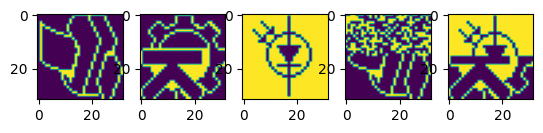

In [8]:
#Display of patterns, p1,p2,p3,p10,p11 
fig, (ax1,ax2, ax3,ax4,ax5) = plt.subplots(1, 5)
ax1.imshow(all_patterns[0].reshape(32,32))
ax2.imshow(all_patterns[1].reshape(32,32))
ax3.imshow(all_patterns[2].reshape(32,32))
ax4.imshow(all_patterns[9].reshape(32,32))
ax5.imshow(all_patterns[10].reshape(32,32))
plt.show()

• Can the network complete a degraded pattern? Try the pattern p10, which
is a degraded version of p1, or p11 which is a mixture of p2 and p3.

In [9]:
p1 = all_patterns[0]
p2 = all_patterns[1]
p3 = all_patterns[2]
p4 = all_patterns[3]
p5 = all_patterns[4]
p6 = all_patterns[5]
p7 = all_patterns[6]
p8 = all_patterns[7]
p9 = all_patterns[8]
p10 = all_patterns[9]
p11 = all_patterns[10]

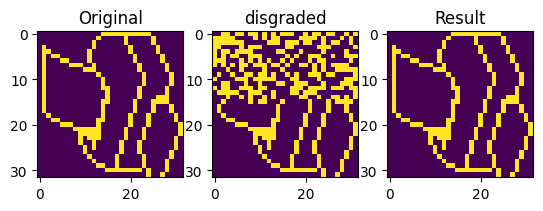

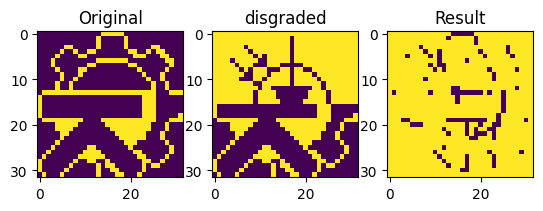

In [10]:
# Chech if p10 and p11 converhe using synchronous approach 
patterns = np.array([p1,p2,p3])
model = Hopfield(1024)
model.fit(patterns)
prediciton_p10,_= model.predict(p10.copy(),1000000, "synchronous" )
prediciton_p11,_  = model.predict(p11.copy(),1000000, "synchronous")


fig, (ax1,ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(p1.reshape(32,32))
ax1.set_title("Original")


ax2.imshow(p10.reshape(32,32))
ax2.set_title("disgraded")

ax3.imshow(prediciton_p10.reshape(32,32))
ax3.set_title("Result")
plt.show()


fig, (ax1,ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(p2.reshape(32,32))
ax1.set_title("Original")
ax2.imshow(p11.reshape(32,32))
ax2.set_title("disgraded")
ax3.imshow(prediciton_p11.reshape(32,32))
ax3.set_title("Result")
plt.show()

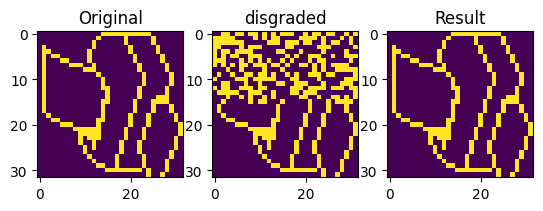

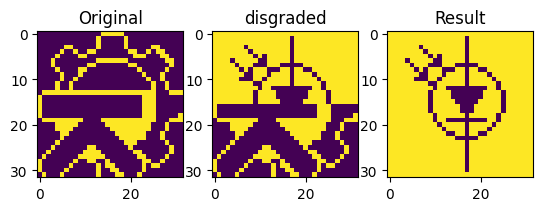

In [11]:
# Chech if p10 and p11 converhe using asynchronous approach 
patterns = np.array([p1,p2,p3])
model = Hopfield(1024)
model.fit(patterns)
prediciton_p10,_= model.predict(p10.copy(),1000000, "asynchronous")
prediciton_p11,_  = model.predict(p11.copy(),1000000, "asynchronous")


fig, (ax1,ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(p1.reshape(32,32))
ax1.set_title("Original")


ax2.imshow(p10.reshape(32,32))
ax2.set_title("disgraded")

ax3.imshow(prediciton_p10.reshape(32,32))
ax3.set_title("Result")
plt.show()


fig, (ax1,ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(p2.reshape(32,32))
ax1.set_title("Original")
ax2.imshow(p11.reshape(32,32))
ax2.set_title("disgraded")
ax3.imshow(prediciton_p11.reshape(32,32))
ax3.set_title("Result")
plt.show()

# P10 converge using synchronous approach 
# P10 and p11 converge using asynchronous approach 


3.3 Energy


Can we be sure that the network converges, or will it cycle between different
states forever?
For networks with a symmetric connection matrix it is possible to define
an energy function or Lyapunov function, a finite-valued function of the state
that always decreases as the states change. Since it has to have a minimum at
least somewhere the dynamics must end up in an attractor1



• What is the energy at the different attractors?

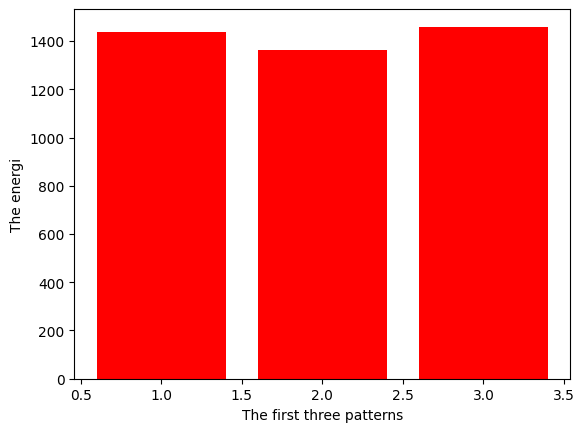

In [12]:
patterns = np.array([p1,p2,p3])
model = Hopfield(1024)
model.fit(patterns)
attractors_energi =  []
for pattern in patterns: 
 attractors_energi.append(calculate_energy(model.weights, pattern))

plt.bar(np.arange(1,len(attractors_energi)+1,1), (-1)* np.array(attractors_energi), color="red")
plt.xlabel("The first three patterns")
plt.ylabel("The energi")
plt.show()

• Follow how the energy changes from iteration to iteration when you use
the sequential update rule to approach an attractor.

In [13]:
patterns = np.array([p1,p2,p3])
model = Hopfield(1024)
model.fit(patterns)
prediciton_p10, energi_10= model.predict(p10.copy(),1000000, "asynchronous")
prediciton_p11,energi_11  = model.predict(p11.copy(),1000000, "asynchronous")

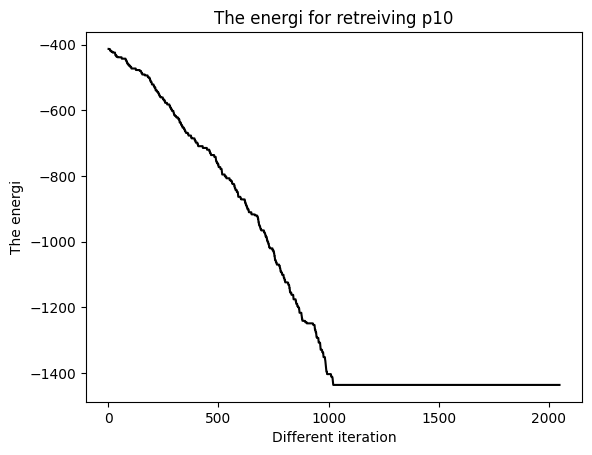

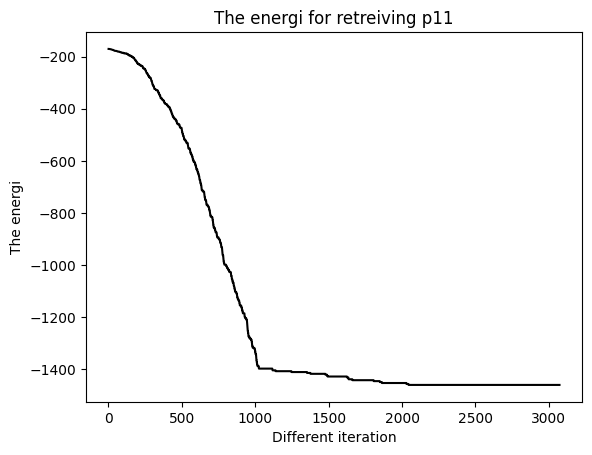

In [14]:

plt.plot(np.arange(1,len(energi_10)+1,1), (1)* np.array(energi_10), color="black")
plt.xlabel("Different iteration")
plt.ylabel("The energi")
plt.title("The energi for retreiving p10")
plt.show()

plt.plot(np.arange(1,len(energi_11)+1,1), (1)* np.array(energi_11), color="black")
plt.xlabel("Different iteration")
plt.ylabel("The energi")
plt.title("The energi for retreiving p11")
plt.show()

• Generate a weight matrix by setting the weights to normally distributed
random numbers, and try iterating an arbitrary starting state. What
happens? 

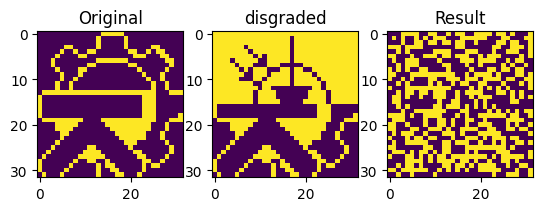

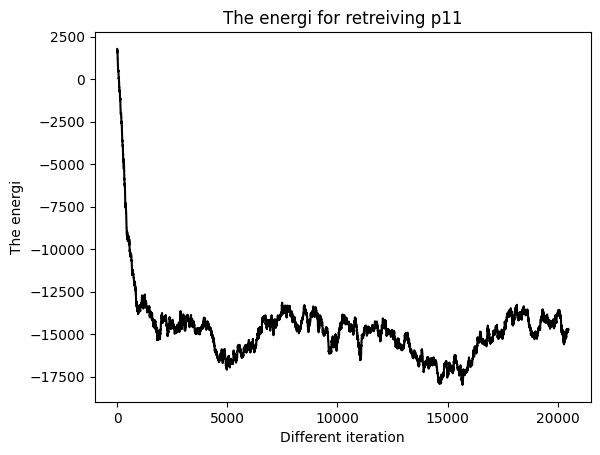

In [15]:
patterns = np.array([p1,p2,p3])
model = Hopfield(1024)
model.fit(patterns)
model.random_weights()
prediciton_p11, energi_11  = model.predict(p11.copy(),20, "asynchronous")


fig, (ax1,ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(p2.reshape(32,32))
ax1.set_title("Original")
ax2.imshow(p11.reshape(32,32))
ax2.set_title("disgraded")
ax3.imshow(prediciton_p11.reshape(32,32))
ax3.set_title("Result")
plt.show()

plt.plot(np.arange(1,len(energi_11)+1,1), (1)* np.array(energi_11), color="black")
plt.xlabel("Different iteration")
plt.ylabel("The energi")
plt.title("The energi for retreiving p11")
plt.show()

• Make the weight matrix symmetric (e.g. by setting w=0.5*(w+w')). What
happens now?

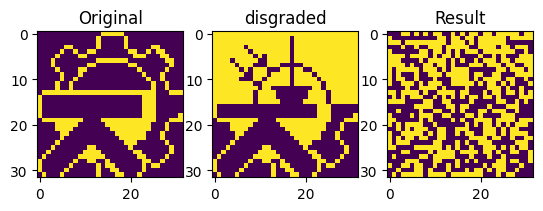

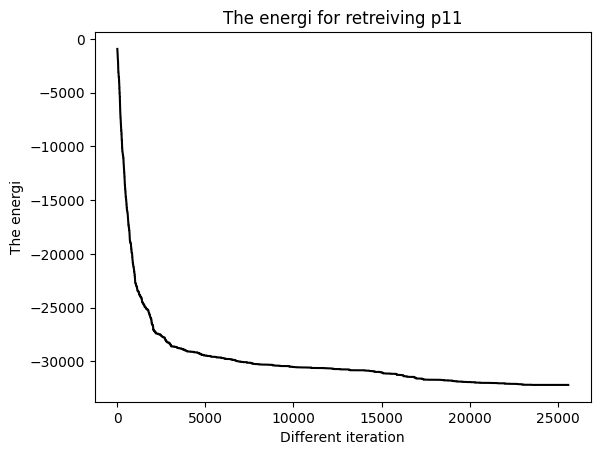

In [16]:
patterns = np.array([p1,p2,p3])
model = Hopfield(1024)
model.fit(patterns)
model.random_weights()
model.symmetric_weight()
prediciton_p11, energi_11  = model.predict(p11.copy(),100000, "asynchronous")


fig, (ax1,ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(p2.reshape(32,32))
ax1.set_title("Original")
ax2.imshow(p11.reshape(32,32))
ax2.set_title("disgraded")
ax3.imshow(prediciton_p11.reshape(32,32))
ax3.set_title("Result")
plt.show()

plt.plot(np.arange(1,len(energi_11)+1,1), (1)* np.array(energi_11), color="black")
plt.xlabel("Different iteration")
plt.ylabel("The energi")
plt.title("The energi for retreiving p11")
plt.show()

3.4 Distortion Resistance

The key propert studied here is the resistance of Hopfield network to noise
and distortion. In order to study the network's robustness you can generate
noisy/distorted test stimuli by randomly flipping a selected number of units,
and investigate whether the network recovers the original clean patterns that
have been used for training.
In particular, train a network with p1, p2, p3, add noise to a pattern,
iterate it a number of times and check whether it has been successfully restored.
Let the script run across 0 to 100% noise and plot the result. For speed, use
the Little model rather than asynchronous updates.


• How much noise can be removed?

• Is there any difference between the three attractors with regard to noise
tolerance?

• Does the network always converge to the right attractor? Do the extra
iterations (beyond a single-step recall) help? Do you notice any other
attractors?


In [17]:
def flip_bits(pattern, percentage,indices):
    flip_indices = np.random.choice(indices, size=int(percentage*len(indices)),  replace=False)
    temp = pattern.copy()
    for index in flip_indices:
        temp[index] = -1 * temp[index] 

    return temp  

In [18]:
size = 1024
indices = np.arange(0,size,1)  
percentages = np.arange(0.1,1.1,0.1)
patterns = np.array([p1,p2,p3])
model = Hopfield(1024)
model.fit(patterns)

for percentage in percentages:
  
  print("The result when " + str(int(percentage*100)) + " % of the array is flipped")
  
  prediciton, _ = model.predict(flip_bits(p1,percentage,indices).copy(),100, "synchronous")
  if(np.array_equal(prediciton,p1)):
        print("True, The model could retrive the pattern p1")
  else:
        print("False, The model could not retrive the pattern p1") 

  
  prediciton, _ = model.predict(flip_bits(p2,percentage,indices).copy(),100, "synchronous")
  if(np.array_equal(prediciton,p2)):
        print("True, The model could retrive the pattern p2")
  else:
        print("False, The model could not retrive the pattern p2") 


  prediciton, _ = model.predict(flip_bits(p3,percentage,indices).copy(),100, "synchronous")
  if(np.array_equal(prediciton,p3)):
        print("True, The model could retrive the pattern p3")
  else:
        print("False, The model could not retrive the pattern p3")    

  print()               


The result when 10 % of the array is flipped
True, The model could retrive the pattern p1
True, The model could retrive the pattern p2
True, The model could retrive the pattern p3

The result when 20 % of the array is flipped
True, The model could retrive the pattern p1
True, The model could retrive the pattern p2
False, The model could not retrive the pattern p3

The result when 30 % of the array is flipped
True, The model could retrive the pattern p1
True, The model could retrive the pattern p2
True, The model could retrive the pattern p3

The result when 40 % of the array is flipped
False, The model could not retrive the pattern p1
True, The model could retrive the pattern p2
True, The model could retrive the pattern p3

The result when 50 % of the array is flipped
False, The model could not retrive the pattern p1
False, The model could not retrive the pattern p2
False, The model could not retrive the pattern p3

The result when 60 % of the array is flipped
False, The model could no

3.5 Capacity
Now add more and more memories to the network to see where the limit is.
Start by adding p4 into the weight matrix and check if moderately distorted
patters can still be recognized. Then continue by adding others such as p5, p6
and p7 in some order and checking the performance after each addition.
• How many patterns could safely be stored? Was the drop in performance
gradual or abrupt?


In [19]:
indices_pattern = np.arange(0,size,1) 
indices = np.arange(3,9,1)
for index in indices:
    model = Hopfield(1024)
    model.fit(all_patterns[0:index])
    patterns = all_patterns[0:index]
    
    stored_patterns =0
    for pattern in patterns: 
        prediction, _  = model.predict(flip_bits(pattern,0.2,indices_pattern).copy(),100, "synchronous")
        if(np.array_equal(prediction,pattern)):
          stored_patterns +=1

    print("The model can store " + str(stored_patterns) + " patterns")  


#Seems can store only 3 patterns

The model can store 3 patterns
The model can store 0 patterns
The model can store 0 patterns
The model can store 0 patterns
The model can store 0 patterns
The model can store 0 patterns


• Try to repeat this with learning a few random patterns instead of the
pictures and see if you can store more

In [20]:
indices_pattern = np.arange(0,1024,1) 
random_all_patterns = [np.random.choice([1,-1],1024) for i in range(13)]
random_all_patterns = np.array(random_all_patterns)
indices = np.arange(1,11,1)
for index in indices:
    model = Hopfield(1024)
    model.fit(random_all_patterns[0:index])
    patterns = random_all_patterns[0:index]
    
    stored_patterns =0
    for pattern in patterns: 
        prediction, _  = model.predict(flip_bits(pattern,0.2, indices_pattern).copy(),1, "synchronous")
        if(np.array_equal(prediction,pattern)):
          stored_patterns +=1

    print("The model can store " + str(stored_patterns) + " patterns")  


#seem store more than 3 patterns

The model can store 1 patterns
The model can store 2 patterns
The model can store 3 patterns
The model can store 4 patterns
The model can store 5 patterns
The model can store 6 patterns
The model can store 7 patterns
The model can store 8 patterns
The model can store 9 patterns
The model can store 10 patterns


Create 300 random patterns and train a 100-unit (or larger) network with
them. After each new pattern has been added to the weight matrix, calculate
how many of the earlier patterns remain stable (a single iteration does not cause
them to change) and plot it.

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 12, 10, 10, 11, 8, 7, 4, 3, 4, 2, 3, 2, 1, 1, 1, 1, 1, 1, 2, 0, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


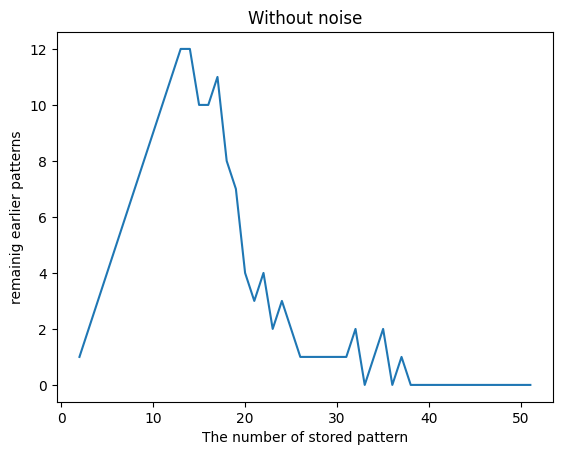

In [21]:
random_all_patterns = [np.random.choice([1,-1],100) for _ in range(300)]
random_all_patterns = np.array(random_all_patterns)

size = 300
  
indices = np.arange(2,300,1)
result = []
for index in indices:
    model = Hopfield(100)
    model.fit(random_all_patterns[0:index])
    patterns = random_all_patterns[0:index]
    
    stored_patterns =0
    for i in range(len(patterns)-1): 
        prediction, _  = model.predict(patterns[i].copy(),1, "synchronous")
        if(np.array_equal(prediction,patterns[i])):
          stored_patterns +=1

    result.append(stored_patterns) 


print(result)
plt.plot(indices[0:50],np.array(result)[0:50])
plt.title("Without noise")
plt.xlabel("The number of stored pattern")
plt.ylabel("remainig earlier patterns")
plt.show()

       

What happens if convergence to the pattern from a noisy version (a few
flipped units) is used? What does the different behavior for large number
of patterns mean?


[1, 2, 3, 4, 5, 6, 6, 8, 8, 7, 7, 5, 3, 3, 4, 1, 1, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


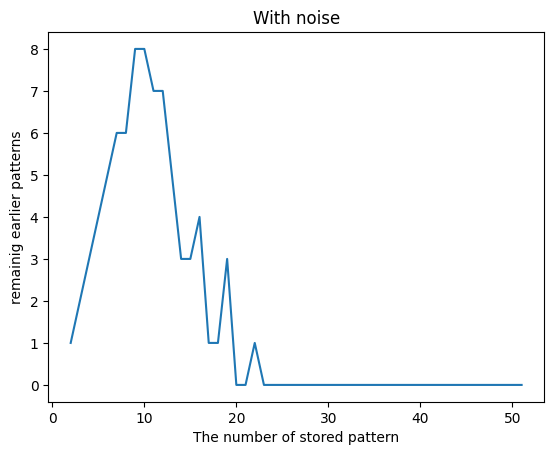

In [22]:
random_all_patterns = [np.random.choice([1,-1],100) for _ in range(300)]
random_all_patterns = np.array(random_all_patterns)

indices_pattern = np.arange(0,100,1)
indices = np.arange(2,300,1)
result = []
for index in indices:
    model = Hopfield(100)
    model.fit(random_all_patterns[0:index])
    patterns = random_all_patterns[0:index]
    
    stored_patterns =0
    for i in range(len(patterns)-1): 
        prediction, _  = model.predict(flip_bits(patterns[i].copy(),0.1,indices_pattern),1, "synchronous")
        if(np.array_equal(prediction,patterns[i])):
          stored_patterns +=1

    result.append(stored_patterns) 

print(result)
plt.plot(indices[0:50],np.array(result)[0:50])
plt.title("With noise")
plt.xlabel("The number of stored pattern")
plt.ylabel("remainig earlier patterns")
plt.show()

       